In [1]:
from egg import EggDataset

c:\Users\Admin\anaconda3\envs\dfine\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
eggdataset = EggDataset(root = "C:/Users/Admin/Desktop/Desktop/Deeplabv3/DeepLabV3Plus-Pytorch/eggdataset/", split='valid')

In [6]:
eggdataset.id_to_train_id

AttributeError: 'EggDataset' object has no attribute 'id_to_train_id'

In [9]:
import os
import xml.etree.ElementTree as ET

def clean_folder(xml_folder, img_folder):
    """
    Xóa các file XML và ảnh không có polygon trong file XML.

    Args:
        xml_folder (str): Đường dẫn đến thư mục chứa các file XML.
        img_folder (str): Đường dẫn đến thư mục chứa các file ảnh.
    """
    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith(".xml"):
            continue
        
        xml_path = os.path.join(xml_folder, xml_file)
        
        try:
            # Parse file XML
            tree = ET.parse(xml_path)
            root = tree.getroot()
            
            # Kiểm tra xem có phần tử <polygon> hay không
            polygons = root.findall(".//polygon")
            if not polygons:
                print(f"No polygon found in: {xml_file}. Deleting...")
                
                # Xóa file XML
                os.remove(xml_path)

                # Tên file ảnh (giả định tên ảnh trùng với tên XML, khác phần mở rộng)
                image_name = os.path.splitext(xml_file)[0]
                for ext in ['.jpg', '.png', '.jpeg']:  # Thêm các định dạng bạn muốn kiểm tra
                    img_path = os.path.join(img_folder, image_name + ext)
                    if os.path.exists(img_path):
                        os.remove(img_path)
                        print(f"Deleted corresponding image: {image_name + ext}")
        except Exception as e:
            print(f"Error processing {xml_file}: {e}")

# Đường dẫn tới folder
xml_folder_path = r"C:\Users\Admin\Desktop\Desktop\Deeplabv3\DeepLabV3Plus-Pytorch\eggdataset\train"
img_folder_path = r"C:\Users\Admin\Desktop\Desktop\Deeplabv3\DeepLabV3Plus-Pytorch\eggdataset\train"

clean_folder(xml_folder_path, img_folder_path)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
eggdataset.__getitem__(0)

(<PIL.Image.Image image mode=RGB size=640x640>,
 tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8))

In [6]:
max(eggdataset.__getitem__(0)[1].flatten())

tensor(4, dtype=torch.uint8)

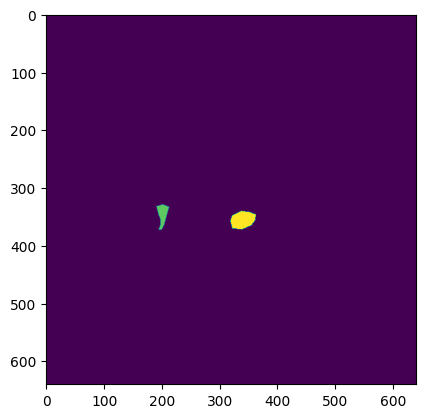

In [7]:
plt.imshow(eggdataset.__getitem__(0)[1])